<a href="https://colab.research.google.com/github/MadmanMarble/Planet_U-NET/blob/main/AOI_make_grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c('raster','sf','fasterize'))
install.packages("googledrive")
install.packages("devtools")

devtools:::install_github("gearslaboratory/gdalUtils")
install.packages("dplyr")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘sp’, ‘Rcpp’, ‘terra’, ‘classInt’, ‘s2’, ‘units’, ‘wk’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’





R.methodsS3 (NA -> 1.8.2 ) [CRAN]
R.oo        (NA -> 1.26.0) [CRAN]
iterators   (NA -> 1.0.14) [CRAN]
R.utils     (NA -> 2.12.3) [CRAN]
foreach     (NA -> 1.5.2 ) [CRAN]


Skipping 1 packages not available: rgdal

Installing 6 packages: R.methodsS3, R.oo, iterators, rgdal, R.utils, foreach

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rgdal’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpHHFu1J/remotes19744232081f/gearslaboratory-gdalUtils-8872aaf/DESCRIPTION’ ... OK
* preparing ‘gdalUtils’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘gdalUtils_2.0.3.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/RtmpHHFu1J/file197444216f57/gdalUtils_2.0.3.2.tar.gz’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
library(stringr)
library(dplyr)
# library(gdalUtils)

drive_auth(use_oob = TRUE, cache = FALSE)

Loading required package: sp

Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE


Attaching package: ‘fasterize’


The following object is masked from ‘package:graphics’:

    plot


The following object is masked from ‘package:base’:

    plot



Attaching package: ‘magrittr’


The following object is masked from ‘package:raster’:

    extract



Attaching package: ‘data.table’


The following object is masked from ‘package:raster’:

    shift



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:raster’:

    intersect, select, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.app

Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIQ0FVcm5jRUYyVVhfN0xfRlBvVFNSeGRzLURWRExyazl4al9oUmpldklDOVJfTkFuVV94dkxldUlub2JLWmN1ZyIsInN0YXRlIjoiYzdmODZjYzVjNjc2YjA0ZjM3YTM3YjAwMzJlY2VjMTUifQ==


In [3]:
dir.create("/content/labels")
dir.create("/content/imagery")
dir.create("/content/imagery/planet")
dir.create("/content/imagery/planet/2018")
dir.create("/content/imagery/planet/2019")
dir.create("/content/imagery/planet/2020")
dir.create("/content/workingfolder")
dir.create("/content/workingfolder/aoi")
dir.create("/content/workingfolder/dem")
dir.create("/content/workingfolder/ccap")
dir.create ("/content/workingfolder/nlcd")

## load images and assign variables

In [4]:
# Load Planet 2018 utm4 select files
# https://drive.google.com/drive/folders/1EX6fe0vObp8VOLcGqxFsxIZhQ9mu0un_?usp=drive_link
#
jp_folder = "1EX6fe0vObp8VOLcGqxFsxIZhQ9mu0un_"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/imagery/planet/2018/', i_dir$name[1])
      )
    })
  }

# Load Planet 2019 utm4 select files
# https://drive.google.com/drive/folders/1h-OSRbTn3AhbNswTb3jooqRs68QB92T2?usp=drive_link
jp_folder = "1h-OSRbTn3AhbNswTb3jooqRs68QB92T2"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/imagery/planet/2019/', i_dir$name[1])
      )
    })
  }

# Load Planet 2020 utm4 select files
# https://drive.google.com/drive/folders/1sUlR77kvCtXjXPy7z2nztJzTvhUvXU9w?usp=drive_link
jp_folder = "1sUlR77kvCtXjXPy7z2nztJzTvhUvXU9w"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/imagery/planet/2020/', i_dir$name[1])
      )
    })
  }



# A dribble: 1 × 3
  name           id                                drive_resource   
  <chr>          <drv_id>                          <list>           
1 input_tif_2018 1EX6fe0vObp8VOLcGqxFsxIZhQ9mu0un_ <named list [34]>


File downloaded:

• input_tif_2018.vrt <id: 1zalJCUfk6mynHywA9UIL5WXx34sqw7f7>

Saved locally as:

• /content/imagery/planet/2018/input_tif_2018.vrt

File downloaded:

• Copy of haleiwa_2018-01-12.tif <id: 1KFoE4qqW5YqXlAH7GbetG8F9SVEIHvlM>

Saved locally as:

• /content/imagery/planet/2018/Copy of haleiwa_2018-01-12.tif

File downloaded:

• Copy of pearl_harbor_2018-01-14.tif <id: 1IdK0osTcDcIOKHp03sEbuooKhELtkTyy>

Saved locally as:

• /content/imagery/planet/2018/Copy of pearl_harbor_2018-01-14.tif

File downloaded:

• Copy of kahuku_2018-02-19.tif <id: 109DHLMjo63vZCA83lXKcaGMQIkulIryV>

Saved locally as:

• /content/imagery/planet/2018/Copy of kahuku_2018-02-19.tif

File downloaded:

• Copy of kawainui_2018-01-26.tif <id: 1d_ZlKw2WU_fRwPhlw3OOF9oJYyp3IcIT>

Saved locally as:

• /content/imagery/planet/2018/Copy of kawainui_2018-01-26.tif



# A dribble: 1 × 3
  name           id                                drive_resource   
  <chr>          <drv_id>                          <list>           
1 input_tif_2019 1h-OSRbTn3AhbNswTb3jooqRs68QB92T2 <named list [34]>


File downloaded:

• input_tif_2019.vrt <id: 1-Gv-3U2zKj-25BuiNdxehyLMcm8euaJ->

Saved locally as:

• /content/imagery/planet/2019/input_tif_2019.vrt

File downloaded:

• Copy of haleiwa_2019-01-11.tif <id: 1SwjecV8MqQ92UugW6R8Ekgq5v-aX_B1b>

Saved locally as:

• /content/imagery/planet/2019/Copy of haleiwa_2019-01-11.tif

File downloaded:

• Copy of pearl_harbor_2019-02-20.tif <id: 1hqq3vgk-82b8FyykImXcUek7UekZFUtc>

Saved locally as:

• /content/imagery/planet/2019/Copy of pearl_harbor_2019-02-20.tif

File downloaded:

• Copy of kahuku_2019-03-15.tif <id: 1yGnJKDpowOUax40hzXna4lI-UWfvm7dg>

Saved locally as:

• /content/imagery/planet/2019/Copy of kahuku_2019-03-15.tif

File downloaded:

• Copy of kawainui_2019-01-25.tif <id: 1KT_HFnJ9ti8XzjFfsmWqNLeSKiYVmnyf>

Saved locally as:

• /content/imagery/planet/2019/Copy of kawainui_2019-01-25.tif



# A dribble: 1 × 3
  name           id                                drive_resource   
  <chr>          <drv_id>                          <list>           
1 input_tif_2020 1sUlR77kvCtXjXPy7z2nztJzTvhUvXU9w <named list [34]>


File downloaded:

• input_tif_2020.vrt <id: 1-K-OhIGho715J3G8Uq0qw5QGbvRi0yVk>

Saved locally as:

• /content/imagery/planet/2020/input_tif_2020.vrt

File downloaded:

• Copy of haleiwa_2020-01-21.tif <id: 1MCki_ckMFWBpZgCmdQSAxG93psgfCVXA>

Saved locally as:

• /content/imagery/planet/2020/Copy of haleiwa_2020-01-21.tif

File downloaded:

• Copy of kahuku_2020-01-22.tif <id: 1d5Tj68fIFh4RSCDwL3ilnTunF0HHE_qR>

Saved locally as:

• /content/imagery/planet/2020/Copy of kahuku_2020-01-22.tif

File downloaded:

• Copy of kawainui_2020-01-24.tif <id: 1qsw-SWt4xf134RxICkXRGff_7nxdsIlH>

Saved locally as:

• /content/imagery/planet/2020/Copy of kawainui_2020-01-24.tif

File downloaded:

• Copy of pearl_harbor_2020-01-23.tif <id: 1KQS4OXXMlLJgJNDDbtlY-7cQvnk2oa_->

Saved locally as:

• /content/imagery/planet/2020/Copy of pearl_harbor_2020-01-23.tif



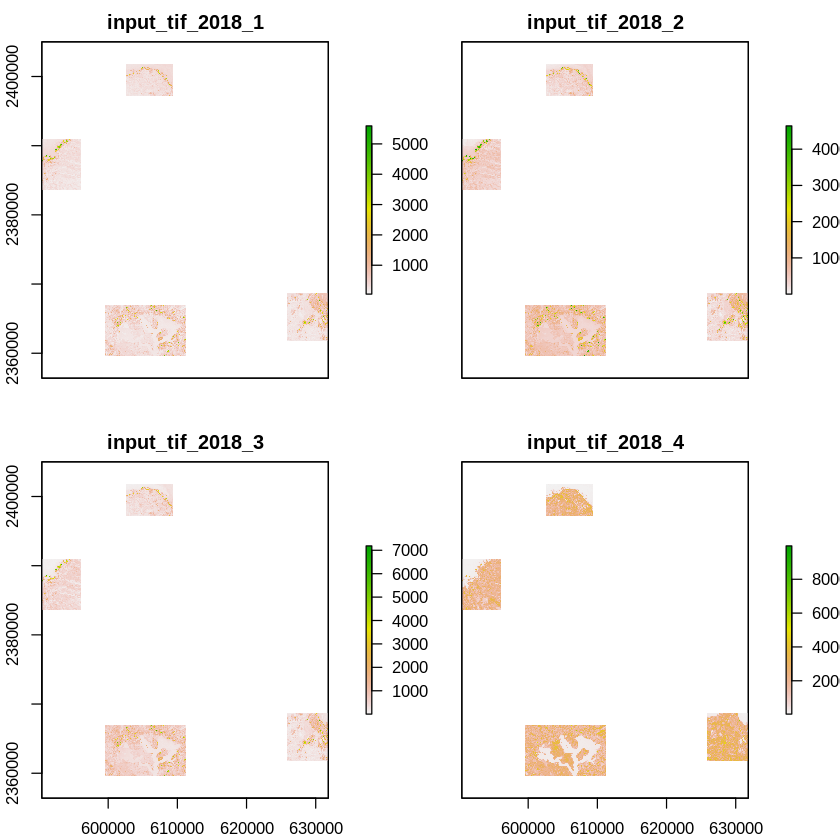

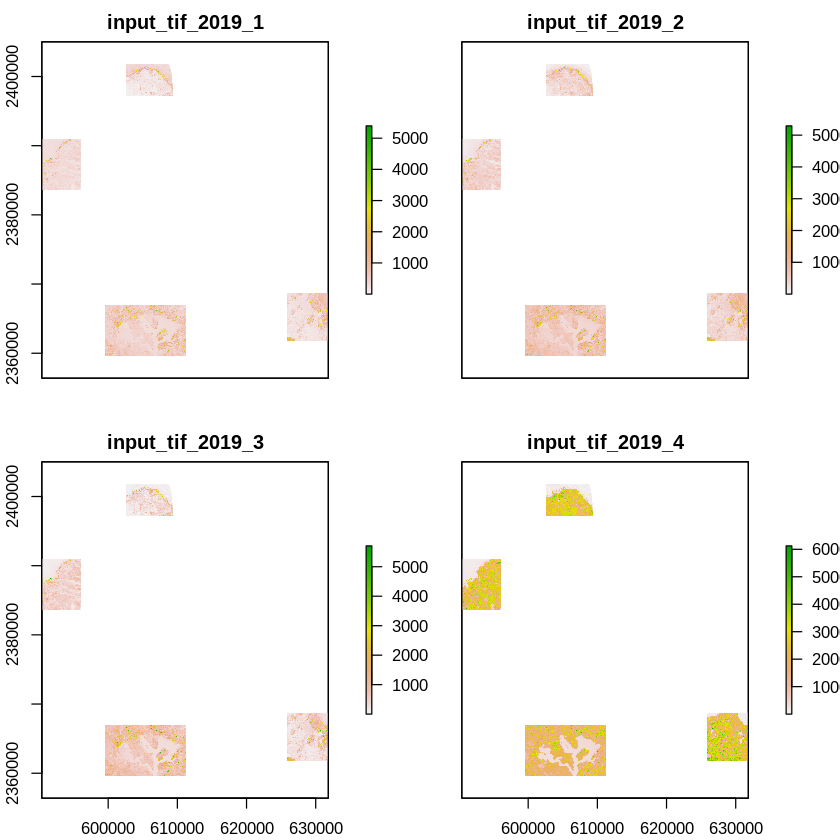

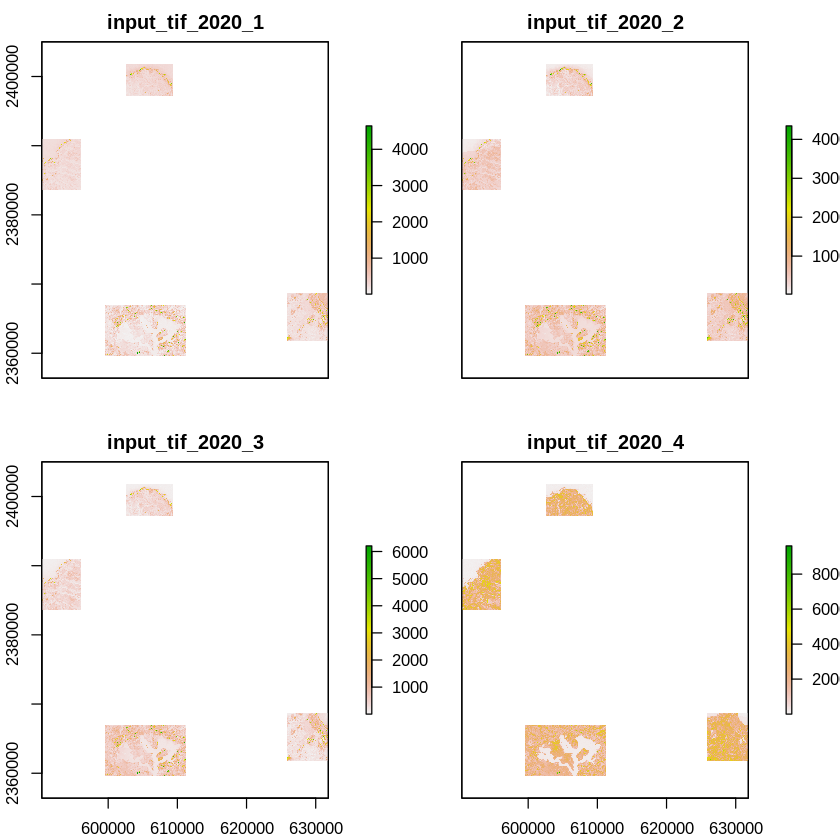

In [5]:
vrt_utm4_2018 <- stack("/content/imagery/planet/2018/input_tif_2018.vrt")
vrt_utm4_2018 %>% plot
vrt_utm4_2019 <- stack("/content/imagery/planet/2019/input_tif_2019.vrt")
vrt_utm4_2019 %>% plot
vrt_utm4_2020 <- stack("/content/imagery/planet/2020/input_tif_2020.vrt")
vrt_utm4_2020 %>% plot

## load working folder and assign variables

In [6]:
# https://drive.google.com/drive/folders/1SJtFMy9oe2D8dFrWoMgRmLXL2N6oNvej?usp=drive_link
jp_folder = "1SJtFMy9oe2D8dFrWoMgRmLXL2N6oNvej"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/aoi/', i_dir$name[1])
      )
    })
  }


# A dribble: 1 × 3
  name       id                                drive_resource   
  <chr>      <drv_id>                          <list>           
1 input_gpkg 1SJtFMy9oe2D8dFrWoMgRmLXL2N6oNvej <named list [34]>
Error in get_export_mime_type(mime_type) : 
  Not a recognized Google MIME type:
✖ application/vnd.google-apps.folder


File downloaded:

• aoi_extent_384.gpkg <id: 1mZ6-cu2Cucd-k4llJdJuWMJ0n9C7JMcJ>

Saved locally as:

• /content/workingfolder/aoi/aoi_extent_384.gpkg

File downloaded:

• oahu_wetland_labels.gpkg <id: 1OvU7mzJiwC9OL2JFhM9HA6z9_6tWYqhl>

Saved locally as:

• /content/workingfolder/aoi/oahu_wetland_labels.gpkg

File downloaded:

• Haleiwa.gpkg <id: 1ctjh-m8FoU60jLEcFbSIZ4gnpMnVU0Xx>

Saved locally as:

• /content/workingfolder/aoi/Haleiwa.gpkg

File downloaded:

• oahu_aoi_outline.gpkg <id: 1z0yWRYrOjbVnugtcdnBTzw7Te8-6RY0X>

Saved locally as:

• /content/workingfolder/aoi/oahu_aoi_outline.gpkg

File downloaded:

• PearlHarbor.gpkg <id: 111911t8Q8T1PvxVas2265b-PZUEaKre3>

Saved locally as:

• /content/workingfolder/aoi/PearlHarbor.gpkg

File downloaded:

• Kahuku.gpkg <id: 1WqovgDsTe4QaOPULWe-rhB3gZgh3AQ6j>

Saved locally as:

• /content/workingfolder/aoi/Kahuku.gpkg

File downloaded:

• KawainuiMarsh.gpkg <id: 15eXrZy1hiCDS-0BhjdiTzKoN-bp_NIz2>

Saved locally as:

• /content/workingfolde

Reading layer `haleiwa_manual_edits__cleaned' from data source 
  `/content/workingfolder/aoi/Haleiwa.gpkg' using driver `GPKG'
Simple feature collection with 199 features and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 590316.5 ymin: 2385106 xmax: 596060.8 ymax: 2390928
Projected CRS: WGS 84 / UTM zone 4N
Reading layer `haleiwa_manual_edits__cleaned' from data source 
  `/content/workingfolder/aoi/Haleiwa.gpkg' using driver `GPKG'
Simple feature collection with 199 features and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 590316.5 ymin: 2385106 xmax: 596060.8 ymax: 2390928
Projected CRS: WGS 84 / UTM zone 4N


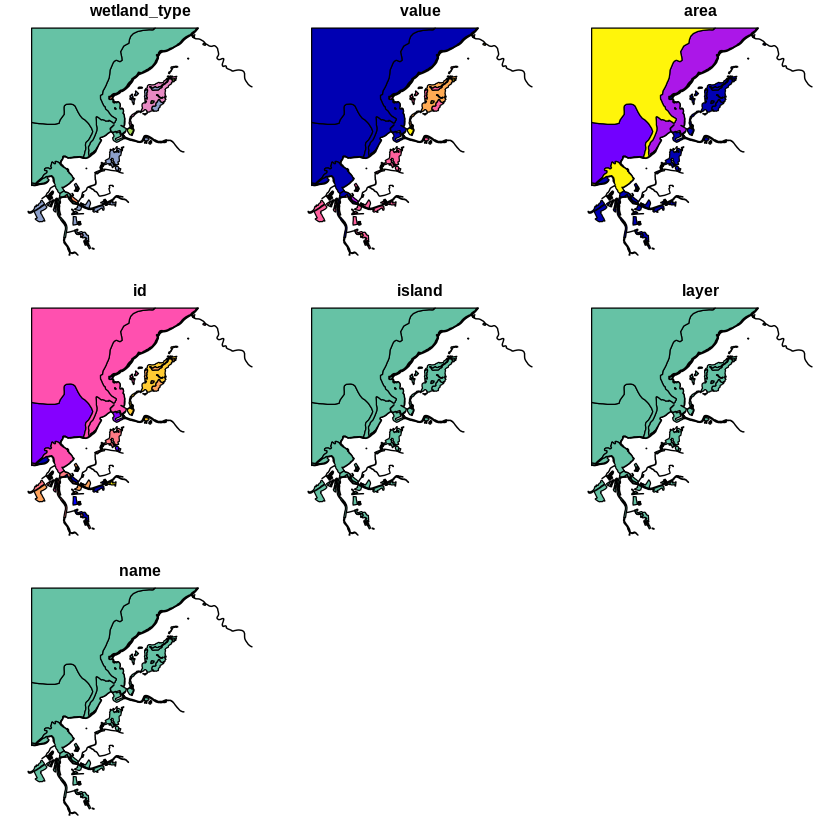

In [7]:
Haleiwa <- st_read("/content/workingfolder/aoi/Haleiwa.gpkg")
Haleiwa %>% plot
nc <- st_read("/content/workingfolder/aoi/Haleiwa.gpkg")
nc %>% plot

Reading layer `kahuku_manual_edits' from data source 
  `/content/workingfolder/aoi/Kahuku.gpkg' using driver `GPKG'
Simple feature collection with 409 features and 7 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 602662.2 ymin: 2397493 xmax: 609352.4 ymax: 2401851
Projected CRS: WGS 84 / UTM zone 4N


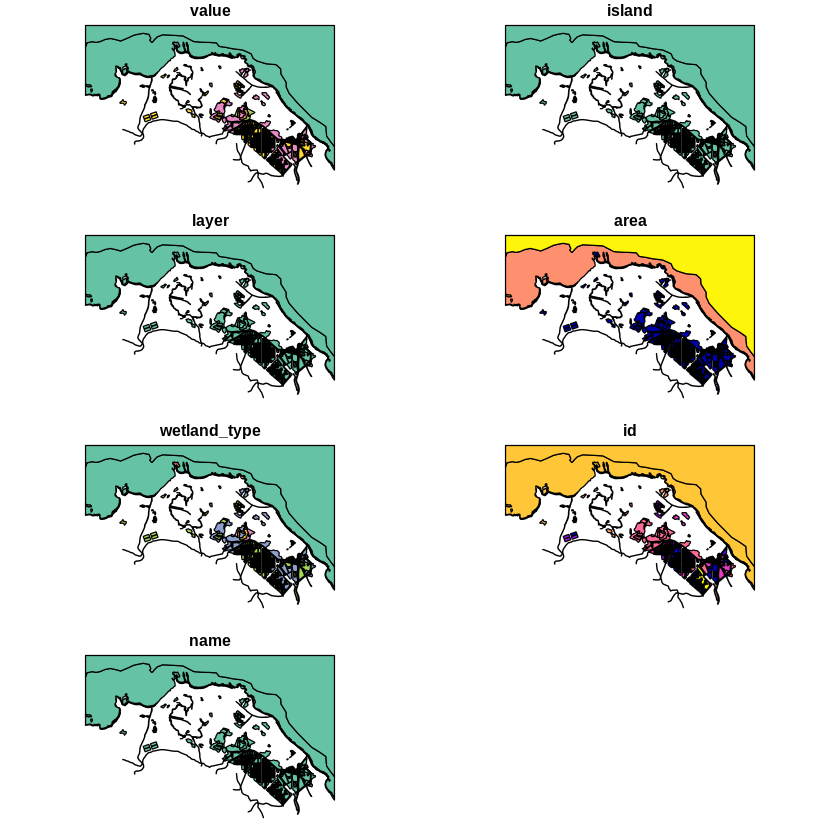

In [8]:
Kahuku <- st_read("/content/workingfolder/aoi/Kahuku.gpkg")
Kahuku %>% plot

Reading layer `4924edits__edits' from data source 
  `/content/workingfolder/aoi/KawainuiMarsh.gpkg' using driver `GPKG'
Simple feature collection with 141 features and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 625834.2 ymin: 2361748 xmax: 632113 ymax: 2368736
Projected CRS: NAD83 / UTM zone 4N


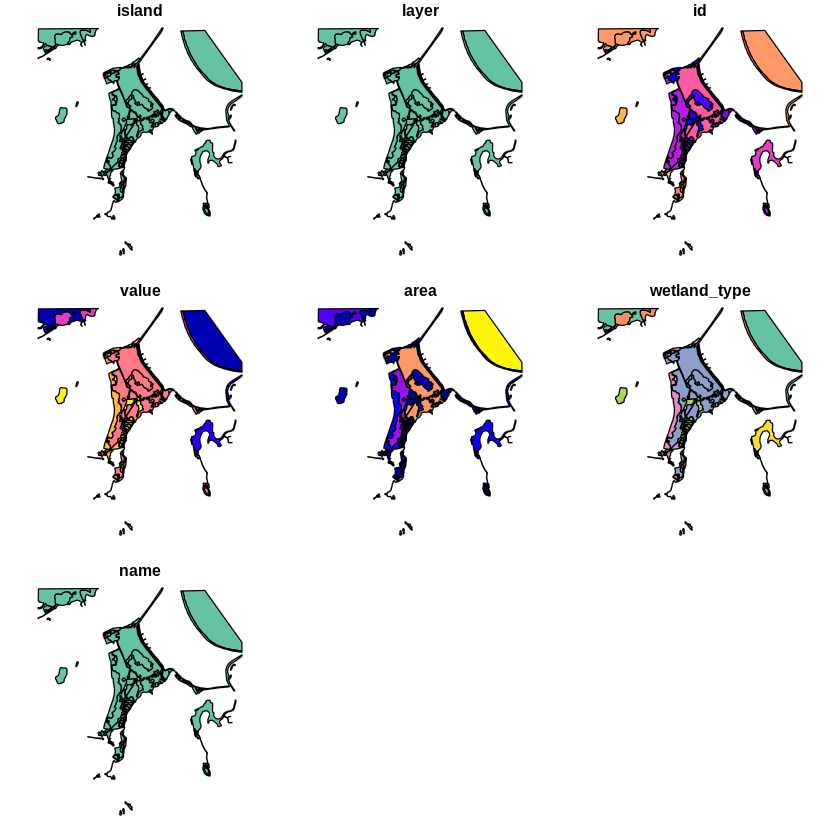

In [9]:
KawainuiMarsh <- st_read("/content/workingfolder/aoi/KawainuiMarsh.gpkg")
KawainuiMarsh %>% plot

Reading layer `editing_wetland_ph_001' from data source 
  `/content/workingfolder/aoi/PearlHarbor.gpkg' using driver `GPKG'
Simple feature collection with 153 features and 7 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 600458.5 ymin: 2361475 xmax: 606351.9 ymax: 2366083
Projected CRS: WGS 84 / UTM zone 4N


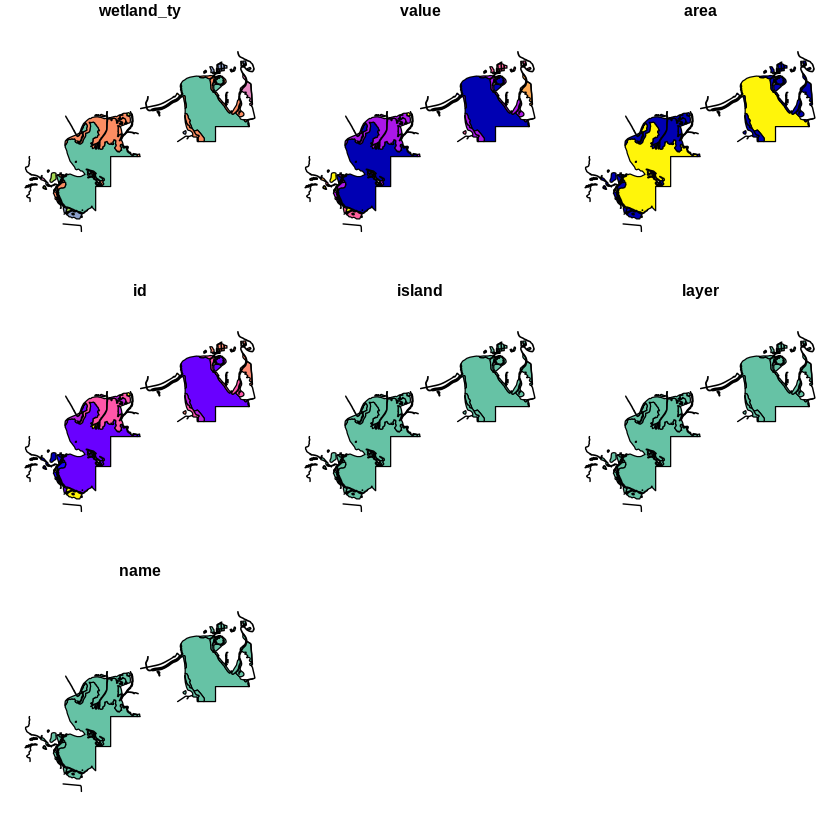

In [10]:
PearlHarbor <- st_read("/content/workingfolder/aoi/PearlHarbor.gpkg")
PearlHarbor %>% plot

Reading layer `aoi_extent_384' from data source 
  `/content/workingfolder/aoi/aoi_extent_384.gpkg' using driver `GPKG'
Simple feature collection with 4 features and 3 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 590408.8 ymin: 2361475 xmax: 632020.8 ymax: 2401512
Projected CRS: NAD83 / UTM zone 4N


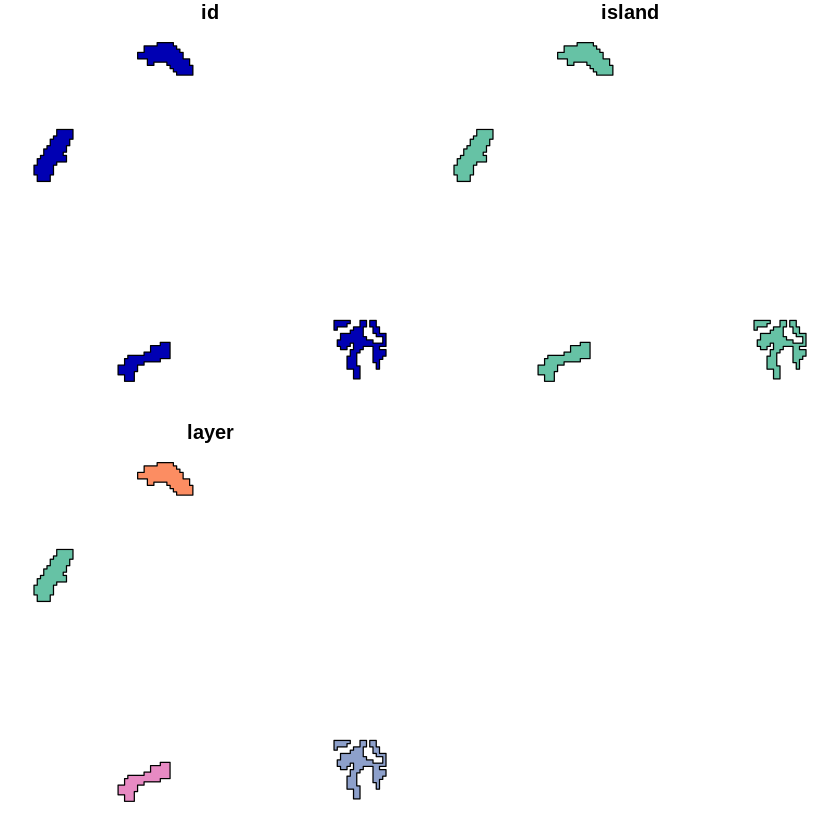

In [11]:
aoi_extent_384 <- st_read("/content/workingfolder/aoi/aoi_extent_384.gpkg")
aoi_extent_384 %>% plot

Reading layer `aoi_oahu__aoi_wetland_4' from data source 
  `/content/workingfolder/aoi/oahu_aoi_outline.gpkg' using driver `GPKG'
Simple feature collection with 4 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 590409.2 ymin: 2361400 xmax: 631823.2 ymax: 2401851
Projected CRS: WGS 84 / UTM zone 4N


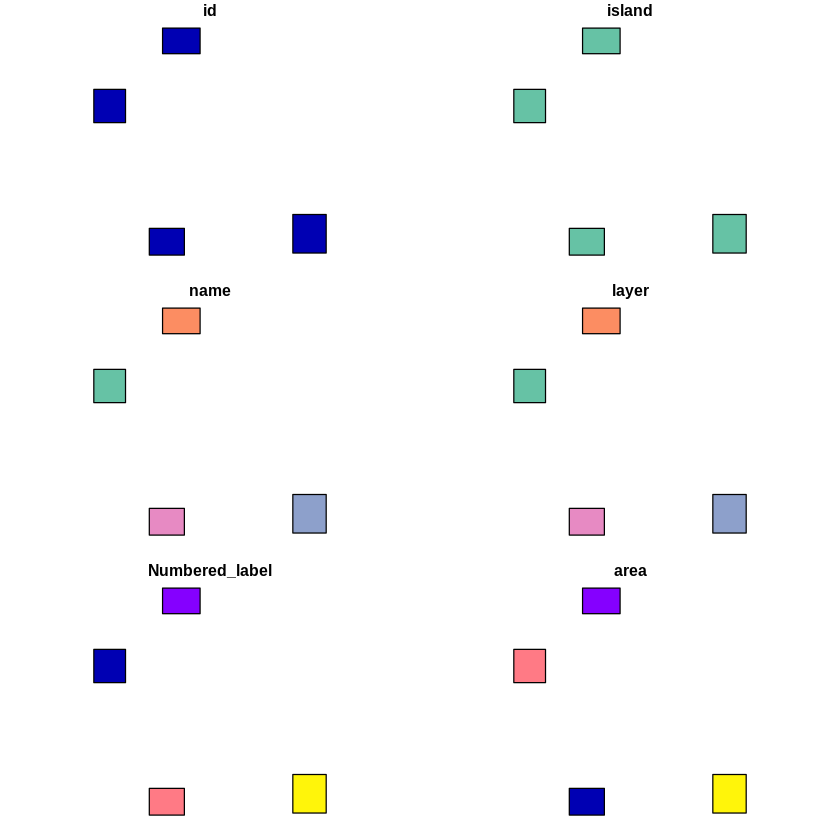

In [12]:
oahu_aoi_outline <- st_read("/content/workingfolder/aoi/oahu_aoi_outline.gpkg")
oahu_aoi_outline %>% plot

Reading layer `aoi_oahu_wetlands' from data source 
  `/content/aoi_oahu_wetlands.gpkg' using driver `GPKG'
Simple feature collection with 902 features and 7 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 590316.5 ymin: 2361475 xmax: 632113 ymax: 2401851
Projected CRS: WGS 84 / UTM zone 4N


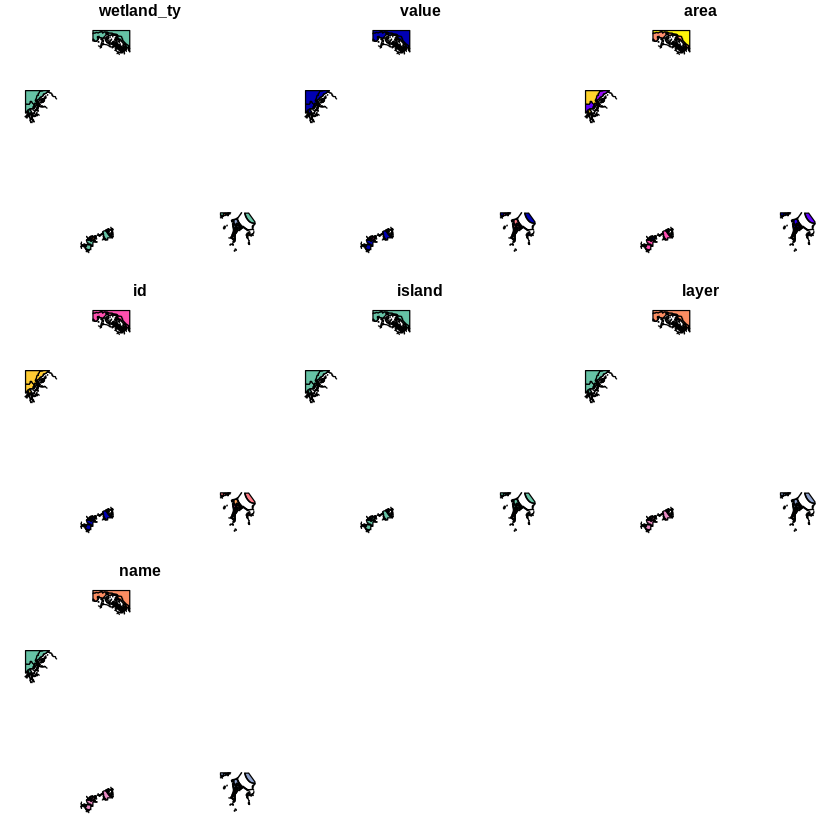

In [128]:
wetland <- st_read("/content/aoi_oahu_wetlands.gpkg")
wetland %>% plot

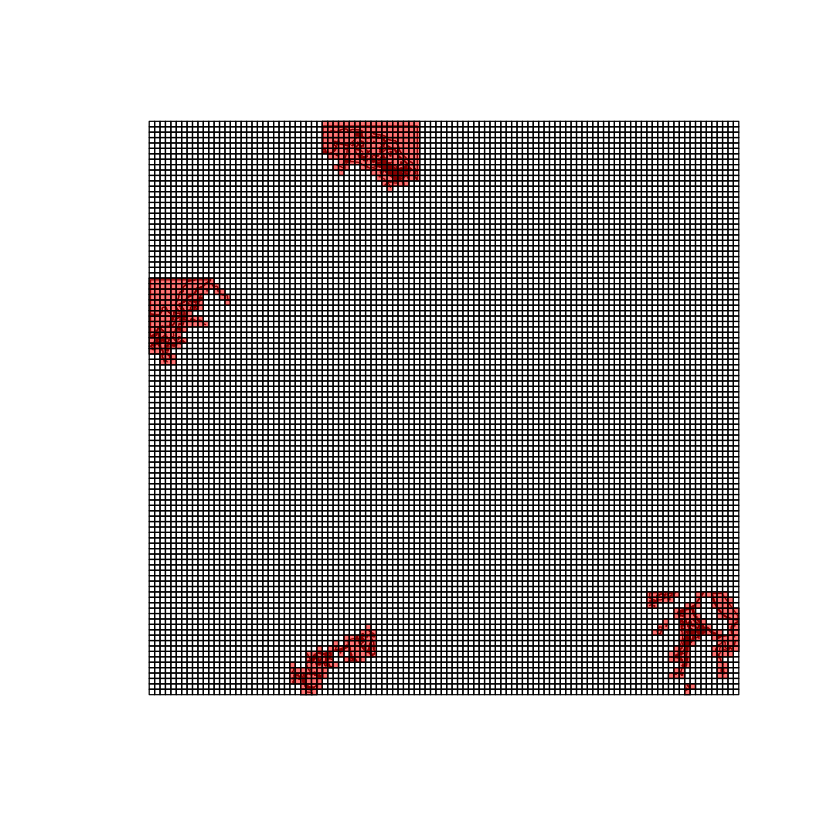

In [132]:
g_wetland = st_make_grid(wetland, cellsize = c(384, 384))
plot(g_wetland)
plot(st_geometry(wetland), add = TRUE)
# g[nc] selects cells that intersect with nc:
plot(g_wetland[wetland], col = '#ff000088', add = TRUE)
g_wetland_intersect = st_as_sf(g_wetland[wetland])

Writing layer `g_wetland_intersect' to data source 
  `/content/sample_data/g_wetland_intersect.gpkg' using driver `GPKG'
Writing 526 features with 0 fields and geometry type Polygon.


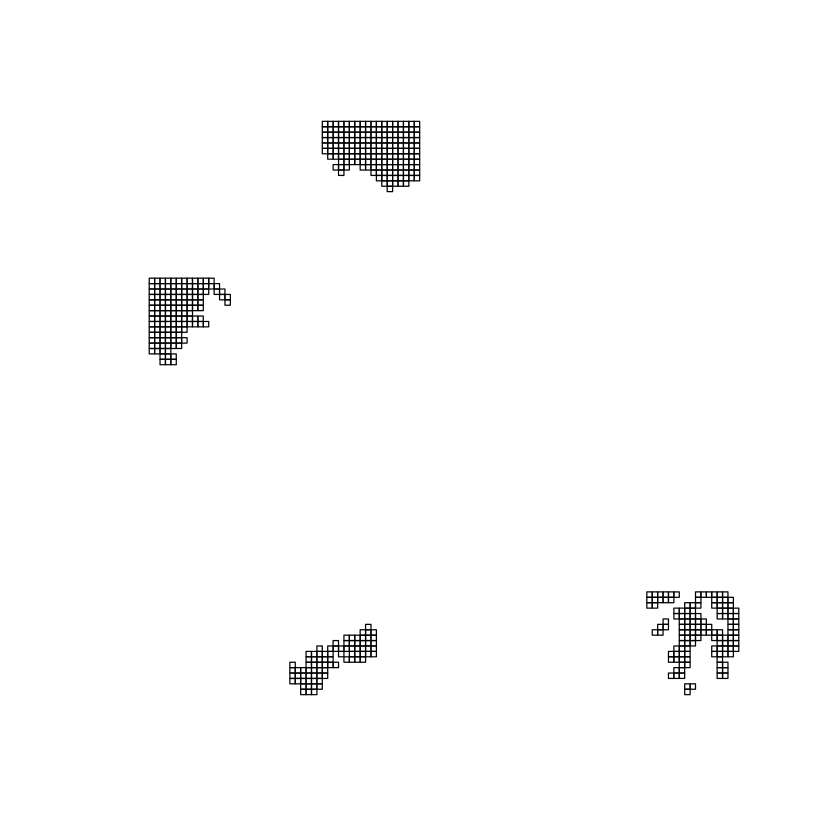

In [134]:
g_wetland_intersect %>% plot
st_write(g_wetland_intersect, "/content/sample_data/g_wetland_intersect.gpkg", driver = "GPKG")

In [145]:
g_wetland_intersect_384 <-
  1:nrow (wetland) %>% lapply(function(x){
    fishnet <- g_wetland_intersect %>% st_as_sf %>% data.table
    fishnet$id <- 1:length(fishnet)
    fishnet_int <- fishnet %>%
      st_as_sf() %>%
      st_intersection(wetland[x,]) %>%
      st_transform(st_crs(26904))
  })

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant through

In [142]:
g_wetland_intersect_384

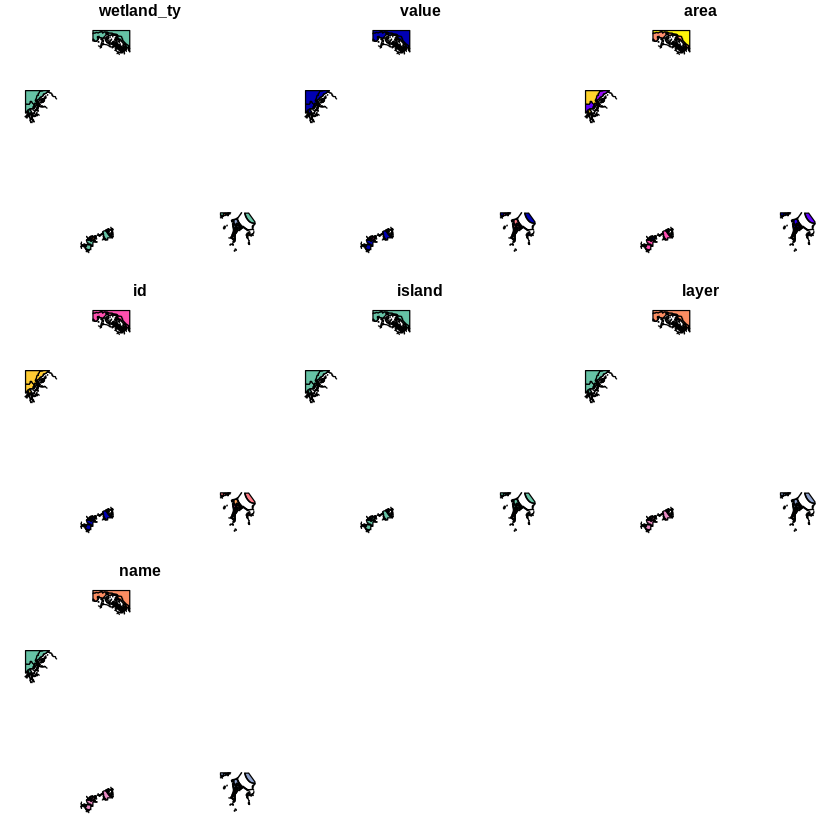

In [140]:
wetland %>% plot

In [ ]:
g1 = st_make_grid(Haleiwa, cellsize = c(384, 384))
plot(g1)
plot(st_geometry(Haleiwa), add = TRUE)
# g[nc] selects cells that intersect with nc:
plot(g1[Haleiwa], col = '#ff000088', add = TRUE)
g1_intersect = st_as_sf(g1[Haleiwa])

In [ ]:
g2 = st_make_grid(Kahuku, cellsize = c(384, 384))
plot(g2)
plot(st_geometry(Kahuku), add = TRUE)
# g[nc] selects cells that intersect with nc:
plot(g2[Kahuku], col = '#ff000088', add = TRUE)
g2_intersect = st_as_sf(g2[Kahuku])

In [ ]:
g3 = st_make_grid(KawainuiMarsh, cellsize = c(384, 384))
plot(g3)
plot(st_geometry(KawainuiMarsh), add = TRUE)
# g[nc] selects cells that intersect with nc:
plot(g3[KawainuiMarsh], col = '#ff000088', add = TRUE)
g3_intersect = st_as_sf(g3[KawainuiMarsh])

In [ ]:
g4 = st_make_grid(PearlHarbor, cellsize = c(384, 384))
plot(g4)
plot(st_geometry(PearlHarbor), add = TRUE)
# g[nc] selects cells that intersect with nc:
plot(g4[PearlHarbor], col = '#ff000088', add = TRUE)
g4_intersect = st_as_sf(g4[PearlHarbor])

In [ ]:
g4_intersect %>% plot

In [16]:
# Save the intersecting grid as a .gpkg file
st_write(g_intersect, "/content/sample_data/intersecting_grid.gpkg", driver = "GPKG")

Writing layer `intersecting_grid' to data source 
  `/content/sample_data/intersecting_grid.gpkg' using driver `GPKG'
Writing 141 features with 0 fields and geometry type Polygon.


In [ ]:
g1_intersect %>% st_as_sf %>% data.table
g2_intersect %>% st_as_sf %>% data.table
g3_intersect %>% st_as_sf %>% data.table
g4_intersect %>% st_as_sf %>% data.table

In [86]:
g1_intersect$layer <- Haleiwa$layer[1]
g2_intersect$layer <- Kahuku$layer[1]
g3_intersect$layer <- KawainuiMarsh$layer[1]
g4_intersect$layer <- PearlHarbor$layer[1]

In [87]:
g1_intersect$island <- Haleiwa$island[1]
g2_intersect$island <- Kahuku$island[1]
g3_intersect$island <- KawainuiMarsh$island[1]
g4_intersect$island <- PearlHarbor$island[1]

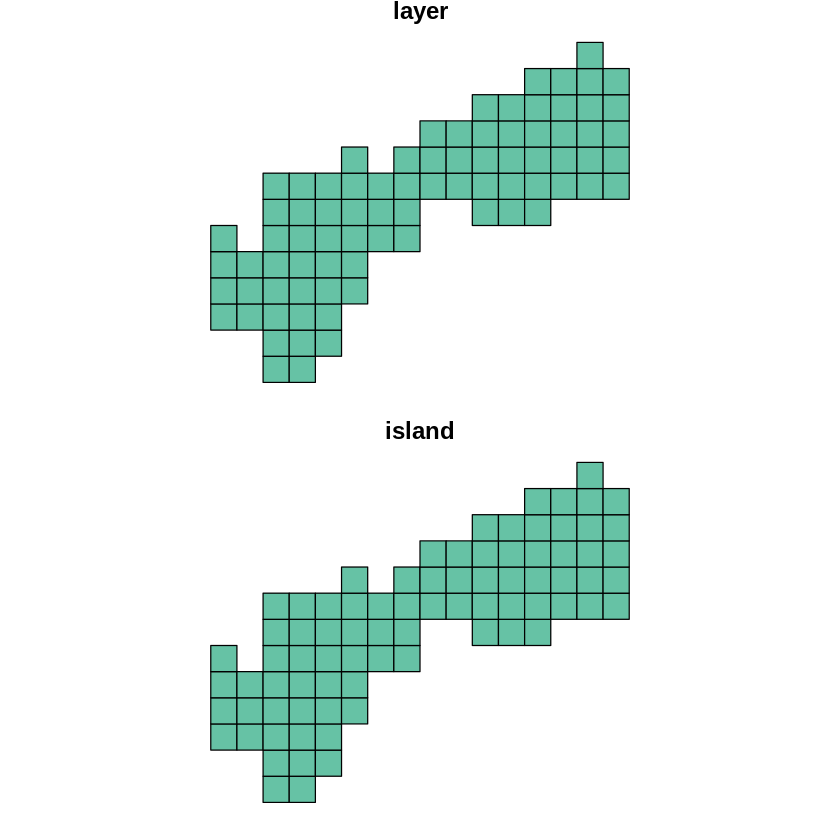

In [94]:
g4_intersect %>% plot

In [ ]:
g1_intersect

In [ ]:
g_wetland
g1_intersect = st_as_sf(g1[Haleiwa])